In [1]:
import tensorflow as tf

C:\Users\MJ\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.11.0'

In [3]:
hello = tf.constant("Hello, TensorFlow!")

- constant를 만들고 hello라는 노드로 입력

- tensorflow에서는 sess를 만들고 sess.run을 해줘야 함

In [4]:
sess = tf.Session()

In [5]:
print(sess.run(hello))

b'Hello, TensorFlow!'


- b는 bytes literals 이라는 의미

# Computational Graph

- +로 이어지는 노드

In [8]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2) # node3 = node1 + node2

In [9]:
print("node1:", node1, "node2:", node2)
print("node3:", node3)

node1: Tensor("Const_3:0", shape=(), dtype=float32) node2: Tensor("Const_4:0", shape=(), dtype=float32)
node3: Tensor("Add_1:0", shape=(), dtype=float32)


- 그냥 출력하면, 각각의 tensor로 인식을 하고 결과값을 출력하진 않음

In [10]:
sess = tf.Session()
print("sess.run(node1,node2):", sess.run([node1, node2]))
print("sess.run(node3):", sess.run(node3))

sess.run(node1,node2): [3.0, 4.0]
sess.run(node3): 7.0


- tensorflow의 전체 구조는
1) graph를 build
2) sess.run() 을 통해서 진행
3) value update 진행

In [11]:
# 1) build grahp(tensors) using TensorFlow operation
# 2) feed data and run graph(operation) = sess.run(operation)
# 3) update variables in the graph(and return values0)

### graph를 만들고, 실행할때 값으로 주고싶다
- placeholder 이용

In [13]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a,b)

In [14]:
print(sess.run(adder_node, feed_dict={a:3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

7.5
[3. 7.]


- array로 placeholder에 넣어줄 수 있음

In [15]:
print(sess.run(adder_node, feed_dict={a:3, b:[2,4]}))

[5. 7.]


- a가 한개인 경우는 반복으로 입력됨

In [17]:
# 1) build grahp(tensors) using TensorFlow operation _ placeholder
# 2) feed data and run graph(operation) = sess.run(operation, feed_dict={x : x_data})
# 3) update variables in the graph(and return values0)

# 1.1 Tensor Ranks, shapes and types

## scalar(magnitude only)
- rank = 0, math entity = Scalar, ex) s=483

## vector(magnitude and direction)
- rank = 1, math entity = vector, ex) v = [1.1, 2.2, 3.3]

## matrix(table of numbers)
- rank = 2, math entity = matrix, ex) m = [[1,2,3], [4,5,6], [7,8,9]]

## 3-tensor(cube of numbers)
- rank = 3, math entity = 3-tensor, ex) t = [[[2], [4], [6]],[[8], [10], [12]], [[14], [16], [18]]]

# 1.2 tensor shape & type
- shape 파악과 type 파악에 주의!
    - type은 보통 float32 사용

# 2. Regression
- H(x) = Wx + b
    - which hypothesis is better??
    
        - 실제 데이터와 직선간의 거리로 계산
        
        - 가설과 실제 데이터간의 거리 계산 = cost function(=loss function)
        
        - (H(x) - y)^2 _ 차이가 - +에 상관없이 양수로 표현가능,
             차이가 클때 더 큰 penalty 부과
        
        - cost = 1/m * sigma((H(x_i) - y_i)^2)   m = number of data
             objective = minimize cost

In [18]:
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

## Variable = trainable variable

In [21]:
W = tf.Variable(tf.random_normal([1]), name="weight") # shape = rank가 1인 array
b = tf.Variable(tf.random_normal([1]), name="bias")

In [22]:
hypothesis = x_train * W + b

In [23]:
# define cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

- tf.reduce_mean = 평균을 내주는 함수

- minimize == GradientDescent

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [29]:
train = optimizer.minimize(cost) # train이라는 node 생성

In [30]:
sess = tf.Session()

In [31]:
sess.run(tf.global_variables_initializer())

In [34]:
# fit the line
for step in range(2018):
    sess.run(train)
    if step % 20 == 0:
        print("step:", step, "cost:",sess.run(cost), "W:",sess.run(W), "b:",sess.run(b))

step: 0 cost: 7.667603e-06 W: [1.0032161] b: [-0.00731093]
step: 20 cost: 6.9638686e-06 W: [1.003065] b: [-0.00696735]
step: 40 cost: 6.3247176e-06 W: [1.002921] b: [-0.00663994]
step: 60 cost: 5.7444927e-06 W: [1.0027838] b: [-0.00632792]
step: 80 cost: 5.2173186e-06 W: [1.0026529] b: [-0.0060306]
step: 100 cost: 4.738467e-06 W: [1.0025283] b: [-0.00574721]
step: 120 cost: 4.303268e-06 W: [1.0024093] b: [-0.00547712]
step: 140 cost: 3.9085307e-06 W: [1.0022962] b: [-0.0052197]
step: 160 cost: 3.5500589e-06 W: [1.0021883] b: [-0.00497444]
step: 180 cost: 3.2240284e-06 W: [1.0020856] b: [-0.00474071]
step: 200 cost: 2.928329e-06 W: [1.0019876] b: [-0.00451797]
step: 220 cost: 2.6597008e-06 W: [1.0018941] b: [-0.00430567]
step: 240 cost: 2.4153805e-06 W: [1.0018051] b: [-0.00410335]
step: 260 cost: 2.1937042e-06 W: [1.0017203] b: [-0.00391056]
step: 280 cost: 1.9925874e-06 W: [1.0016396] b: [-0.0037268]
step: 300 cost: 1.8096416e-06 W: [1.0015624] b: [-0.00355172]
step: 320 cost: 1.64372

## using placeholders in regression

In [35]:
tf.set_random_seed(207)  # for reproducibility

In [36]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [37]:
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

In [45]:
# Our hypothesis XW+b
hypothesis = X * W + b

In [46]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [47]:
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [48]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [51]:
# Fit the line
for step in range(2018):
    cost_val, W_val, b_val, _ =  sess.run([cost, W, b, train], feed_dict={X: [3, 6, 9], Y: [6, 12, 18]})
    # list에 넣어서 한꺼번에 실행
    # cost, W, b, train을 cost_val, W_val, b_val로 각각 저장
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)

0 5.8417726e-07 [1.9997112] [0.00201513]
20 5.213185e-07 [1.9997269] [0.00190526]
40 4.6628134e-07 [1.9997418] [0.0018014]
60 4.17107e-07 [1.999756] [0.00170311]
80 3.721331e-07 [1.9997692] [0.00161022]
100 3.3347783e-07 [1.9997818] [0.00152243]
120 2.9770248e-07 [1.9997936] [0.00143942]
140 2.6583984e-07 [1.999805] [0.00136094]
160 2.375031e-07 [1.9998155] [0.00128673]
180 2.1233124e-07 [1.9998257] [0.00121655]
200 1.899241e-07 [1.9998353] [0.00115012]
220 1.696523e-07 [1.9998441] [0.00108735]
240 1.5222304e-07 [1.9998528] [0.00102803]
260 1.3562726e-07 [1.9998606] [0.00097195]
280 1.2133448e-07 [1.9998683] [0.00091894]
300 1.08465734e-07 [1.9998754] [0.00086883]
320 9.714404e-08 [1.9998822] [0.00082148]
340 8.680528e-08 [1.9998887] [0.00077675]
360 7.757391e-08 [1.9998947] [0.00073442]
380 6.9244074e-08 [1.9999006] [0.00069436]
400 6.204118e-08 [1.999906] [0.00065643]
420 5.5463413e-08 [1.9999111] [0.00062061]
440 4.968054e-08 [1.999916] [0.00058674]
460 4.421266e-08 [1.9999205] [0.0

In [52]:
# Testing our model
print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [7]}))
print(sess.run(hypothesis, feed_dict={X: [2, 8]}))

[10.000002]
[14.]
[ 4.0000052 15.999999 ]


# 3. Minimize cost

### simplify hypothesis
- H(x) = Wx

### Gradient descent algorithm = 경사하강법
- minimize cost/loss function
- Gradient descent is used many minimization problems
- Cost(W, b) = given cost function -> find W, b to minimize cost
- Cost(w1, w2 ....) w가 많은 경우에도 minimize 가능

#### how find the lowest point?
- 경사가 낮은 쪽으로 계속해서 내려가는 방법을 이용 = gradient descent algorithm

#### how it work
- start any other value
- Keeping chaing W and b a little bit to try and reduce cost(W,b)
- Each time you change the parameters, you select the gradient which reduces
- cost(W, b) the most possible
- Repeat
- Do so until you converge to a local minimum
- Has an interesting property
   - Where you start can determine which minimum you end up

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(207)  # for reproducibility

In [54]:
X = [1, 2, 3]
Y = [1, 2, 3]

In [55]:
W = tf.placeholder(tf.float32)

In [56]:
# Our hypothesis for linear model X * W
hypothesis = X * W

In [57]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [58]:
# Launch the graph in a session.
sess = tf.Session()

In [59]:
# Variables for plotting cost function
W_history = []
cost_history = []

In [60]:
for i in range(-30, 50):
    curr_W = i * 0.1 # W = -3 ~ 5
    curr_cost = sess.run(cost, feed_dict={W: curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)

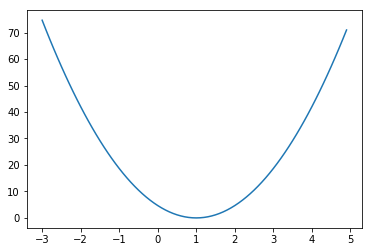

In [61]:
# Show the cost function
plt.plot(W_history, cost_history)
plt.show()

In [62]:
x_data = [1, 2, 3,]
y_data = [1, 2, 3,]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Out hypothesis Wx + b
hypo = W * X

# Cost(Loss) Function
cost = tf.reduce_sum(tf.square(hypo - Y))

learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y:y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y:y_data}), sess.run(W))

0 2.758789 [1.4439104]
1 0.7847223 [1.2367522]
2 0.22320968 [1.1262678]
3 0.063490935 [1.0673429]
4 0.018059611 [1.0359162]
5 0.005136938 [1.0191553]
6 0.0014611592 [1.0102161]
7 0.0004156183 [1.0054486]
8 0.000118226926 [1.002906]
9 3.3629163e-05 [1.0015498]
10 9.5656815e-06 [1.0008266]
11 2.7207086e-06 [1.0004408]
12 7.736812e-07 [1.0002351]
13 2.2018094e-07 [1.0001254]
14 6.266221e-08 [1.0000669]
15 1.7761025e-08 [1.0000356]
16 5.0931703e-09 [1.0000191]
17 1.4446897e-09 [1.0000101]
18 4.0672887e-10 [1.0000054]
19 1.1459633e-10 [1.0000029]
20 3.474554e-11 [1.0000015]


In [63]:
# Lab 3 Minimizing Cost
import tensorflow as tf
tf.set_random_seed(207)  # for reproducibility

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [73]:
# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

# Linear model
hypothesis = X * W

# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Get gradients
gvs = optimizer.compute_gradients(cost, [W])
# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228262, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.73875, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445185, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023252, 1.6216778)]]
20 [